<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2024/blob/master/08_scipy_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 8 - Statistics in Python (Second part - 50')


> A very (very) basic introduction on statistics in Python. In this first introductory lesson we will just present some *Measures of Central Tendency* (median, mean and weighted mean) and *Measures of Variability* (variance and standard deviation). We will also talk about *Percentiles* and *Missing values*.
> 
TODO

sources:

https://medium.com/insights-school/learn-basic-statistics-with-python-cc0f45275929

https://scipy-lectures.org/intro/scipy.html#scipy


In [182]:
import math
import statistics
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# TODO
import plotnine as p9

## Outline
 * [Loading a dataset](#Loading-a-dataset) 
 * [Pearson correlation](#Pearson-correlation)
 * [Spearman correlation](#Spearman-correlation)
 * [Linear regression](#Linear-regression)
 * [Student's t-test](#Student's-t-test)
   * [One-sample t-test](#One-sample-t-test)
   * [Two-sample t-test](#Two-sample-t-test)
   * [Paired samples t-test](#Paired-samples-t-test)

Linear models, multiple factors, and analysis of variance

Categorical variables

ink to t-tests between different FSIQ and PIQ

Multiple Regression:

Analysis of variance (ANOVA)

This document is devised as a tool to enable your **self-learning process**. If you get stuck at some step or need any kind of help, please don't hesitate to raise your hand and ask for the teacher's guidance. Along it, you will find some **special cells**:

<div class="alert alert-block alert-success"><b>Practice:</b> Practice cells announce exercises that you should try during the current boot camp session. Usually, solutions are provided using hidden cells (look for the dot dot dot symbol "..." and click to unravel them and check that your try is correct).
</div>

<div class="alert alert-block alert-warning"><b>Extension:</b> Extension cells correspond to exercises (or links to contents) that are a bit more advanced. We recommend to try them after the current boot camp session.
</div>

<div class="alert alert-block alert-info"><b>Tip:</b> Tip cells just give some advice or complementary information.
</div>

<div class="alert alert-block alert-danger"><b>Caveat:</b> Caveat cells warn you about the most common pitfalls one founds when starts his/her path learning Python.

</div>

## Loading a dataset

Let's stats by loading a dataset from this cool [online resource](https://lectures.scientific-python.org/packages/statistics/index.html).

In [16]:
# Loading the "Brain Size" dataset directly from an URL
df = pd.read_csv(
    filepath_or_buffer='https://scipy-lectures.org/_downloads/brain_size.csv',
    sep=';',
    na_values=".",
    index_col=0
)

# Show df's head
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


The columns *FSIQ*, *VIQ* and *PIQ* stand for different "intelligence quotients" (in arbitrary units I guess) and the *MRI_Count* is another "intelligence" measure based on magnetic resonance imaging (also in some kind of arbitrary unit I guess). The columns *Gender*, *Weight* and *Height* express the gender, the weight (in pounds) and the height (in inches) of the individuals, respectively. Before starting, let's express *Weight* and *Height* column values to metric units to avoid an eventual [Mars probe crash](https://www.simscale.com/blog/nasa-mars-climate-orbiter-metric/).

In [17]:
# Convert from imperial units to metric units
df['Weight [kg]'] = df['Weight'] * 0.45359237
df['Height [m]'] = df['Height'] * 0.0254

# Drop imperial columns
df.drop(columns=['Weight', 'Height'], inplace=True)

# Show df's head
df.head()

,Gender,FSIQ,VIQ,PIQ,MRI_Count,Weight [kg],Height [m]
1,Female,133,132,124,816932,53.523900,1.63830
2,Male,140,150,124,1001121,NaN,1.84150
3,Male,139,123,150,1038437,64.863709,1.86182
4,Male,133,129,128,965353,78.017888,1.74752
5,Female,137,132,134,951545,66.678078,1.65100


## Pearson correlation
We can compute the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) using the [`pearsonr()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) function from SciPy's stats module. This function takes two arrays and returns a tuple containing **Pearson correlation coefficient** and the **significance of the correlation** as p-value.

In [19]:
# Get Pearson between 'FSIQ' and 'VIQ' using SciPy
stats.pearsonr(x=df['FSIQ'], y=df['VIQ'])

PearsonRResult(statistic=np.float64(0.9466387777452883), pvalue=np.float64(2.7891295872460796e-20))

We can also get the Pearson correlation coefficient using the [`.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) Pandas method:

In [23]:
# Get Pearson between 'FSIQ' and 'VIQ' using Pandas
df['FSIQ'].corr(df['VIQ'], method="pearson")

np.float64(0.9466387777452884)

Look what happens when we apply this `.corr()` method to a pandas Dataframe:

In [24]:
# Get Pearson for all pair-wise pairs 'FSIQ' and 'VIQ' using Pandas
df[['FSIQ', 'VIQ']].corr(method='pearson')

,FSIQ,VIQ
FSIQ,1.000000,0.946639
VIQ,0.946639,1.000000


By using the Pandas method `corr()` on a dataframe, we obtain all possible pair-wise correlations nicely displayed in a "square" dataframe (or matrix). Let's try this strategy again on the whole `df` dataframe (note the trick of the `numeric_only=` argument to avoid the error arising from trying to compute correlations involving the `'Gender'` column):

In [40]:
# Get all pair-wise Pearson from our df
df_PCC = df.corr(method='pearson', numeric_only=True)

# Show the Pearson correlation matrix
df_PCC

,FSIQ,VIQ,PIQ,MRI_Count,Weight [kg],Height [m]
FSIQ,1.000000,0.946639,0.934125,0.357641,-0.051483,-0.086002
VIQ,0.946639,1.000000,0.778135,0.337478,-0.076088,-0.071068
PIQ,0.934125,0.778135,1.000000,0.386817,0.002512,-0.076723
MRI_Count,0.357641,0.337478,0.386817,1.000000,0.513378,0.601712
Weight [kg],-0.051483,-0.076088,0.002512,0.513378,1.000000,0.699614
Height [m],-0.086002,-0.071068,-0.076723,0.601712,0.699614,1.000000


Now let's leverage Seaborn [`.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to visualize this!

<Axes: >

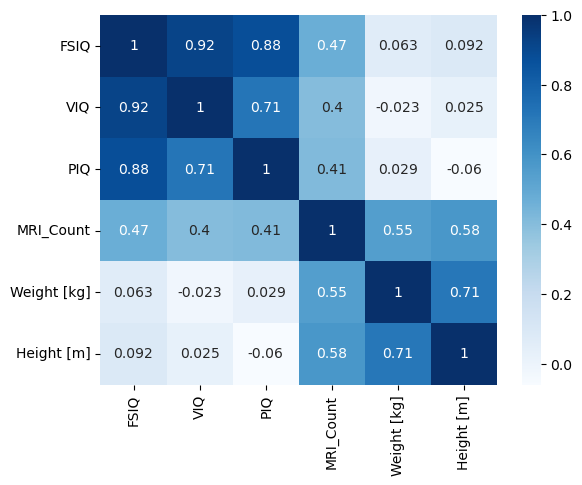

In [54]:
# Plot the correlation matrix (HEATMAP!)
sns.heatmap(data=df_PCC, cmap="Blues", annot=True)

It seems that *FSIQ*, *VIQ* and *PIQ* are very correlated between them, and similarly, *Weight [kg]*, *Height [m]* and (to a lesser extend) *MRI_Count*.

## Spearman correlation

Pearson correlation assumes that the data we are comparing is <u>**normally distributed**</u>. When that assumption is not true, the Pearson correlation value is not reflecting the true association. Spearman correlation does not assume that data follows a specific distribution, so it is a non-parametric correlation measure. Spearman correlation is also known as Spearman's rank correlation as it computes correlation coefficient on rank values of the data. Using SciPy, we can compute Spearman correlation using the function `spearmanr()`:

In [35]:
#The first element of tuple is the Spearman's rank correlation and the second is p-value.
stats.spearmanr(a=df['FSIQ'], b=df['VIQ'])

SignificanceResult(statistic=np.float64(0.9180538517127924), pvalue=np.float64(7.511345723342308e-17))

<div class="alert alert-block alert-info"><b>

Tip:</b> I don't know why `stats.pearsonr()` uses `x=` and `y=` as argument names and `stats.spearmanr()` uses `a=` and `b=`. In any case, you can use these two functions without specifying argument names: `stats.pearsonr(df['FSIQ'], df['VIQ'])` or `stats.spearmanr(df['FSIQ'], df['VIQ'])`.

</div>

Again, we can also get the Spearman correlation coefficient using the [`.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) Pandas method:

In [39]:
# Get Spearman between 'FSIQ' and 'VIQ' using Pandas
df['FSIQ'].corr(df['VIQ'], method="spearman")

np.float64(0.9180538517127924)

Now, we will use the Seaborn function [`clustermap()`](https://seaborn.pydata.org/generated/seaborn.clustermap.html) instead of `heatmap()`:

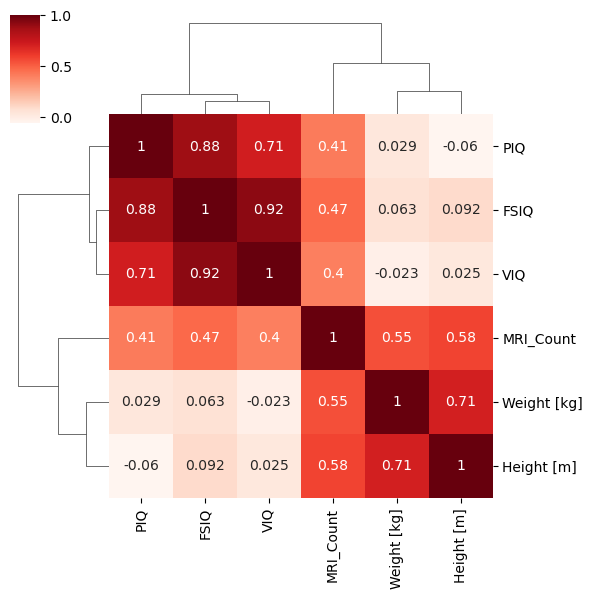

In [55]:
# Get all pair-wise Spearman from our df
df_ECC = df.corr(method='spearman', numeric_only=True)

# Show the Spearman correlation matrix
df_ECC

# Plot the Spearman correlation matrix (CLUSTERMAP!)
sns.clustermap(data=df_ECC, cmap="Reds", annot=True, z_score=None, figsize=(6,6))

Have a look at the [dendrogram](https://en.wikipedia.org/wiki/Dendrogram) and note how it hierarchizes closer those variables more correlated.

## Linear regression

With the SciPy function [`linregress()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) it's very easy to perform a linear regression and get all required coefficients.

In [73]:
# Compute a linear regression between 'FSIQ' and 'VIQ' using SciPy
stats.linregress(x=df['FSIQ'], y=df['VIQ'])

LinregressResult(slope=np.float64(0.9283222580345653), intercept=np.float64(7.031839825978565), rvalue=np.float64(0.9466387777452882), pvalue=np.float64(2.789129587246195e-20), stderr=np.float64(0.051271762159359316), intercept_stderr=np.float64(5.943180194069733))

Note how `stats.linregress()` and object storing five values: `slope`, `intercept`, `rvalue`, `pvalue`, `stderr` and `intercept_stde`. You can assign the output of `stats.linregress()` in a variable and access easily access its elements as follows:

In [76]:
# Compute a linear regression between 'FSIQ' and 'VIQ' using SciPy
FitResults = stats.linregress(x=df['FSIQ'], y=df['VIQ'])

# Return the 'rvalue' (Pearson correlation) generated by the linear regression
FitResults.rvalue

np.float64(0.9466387777452882)

By using some f-string trickery we can easily prepare a nice annotation with the regression line equation:

In [186]:
# Gather the regression line equation (using just 3 decimal places with the :.3f trick)
annotation = f'y(x) = {FitResults.slope:.3f} x + {FitResults.intercept:.3f}'

# Show the regression line equation
print(annotation)

y(x) = 0.928 x + 7.032


Now, let's use **Seaborn** to visualize the regression line along with the data:

Text(95, 145, 'y(x) = 0.928 x + 7.032')

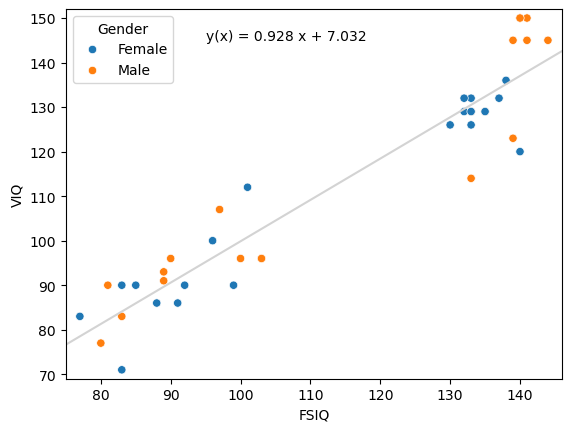

In [181]:
# Create the scatter plot with Seaborn
p = sns.scatterplot(data=df, x="FSIQ", y="VIQ", hue="Gender")

# Add the linear regression line (by hand) with Matplotlib
p.axline(xy1=(0, FitResults.intercept), slope=FitResults.slope, color='lightgray')

# Adjust scatter plot limits (by hand) with Matplotlib
p.set_xlim(df["FSIQ"].min()-2, df["FSIQ"].max()+2)
p.set_ylim(df["VIQ"].min()-2, df["VIQ"].max()+2) 

# Add regression line equation (by hand) with Matplotlib
plt.text(95, 145, annotation)

With **Plotnine** we can also get a very nice plot (maybe with less tweaking):

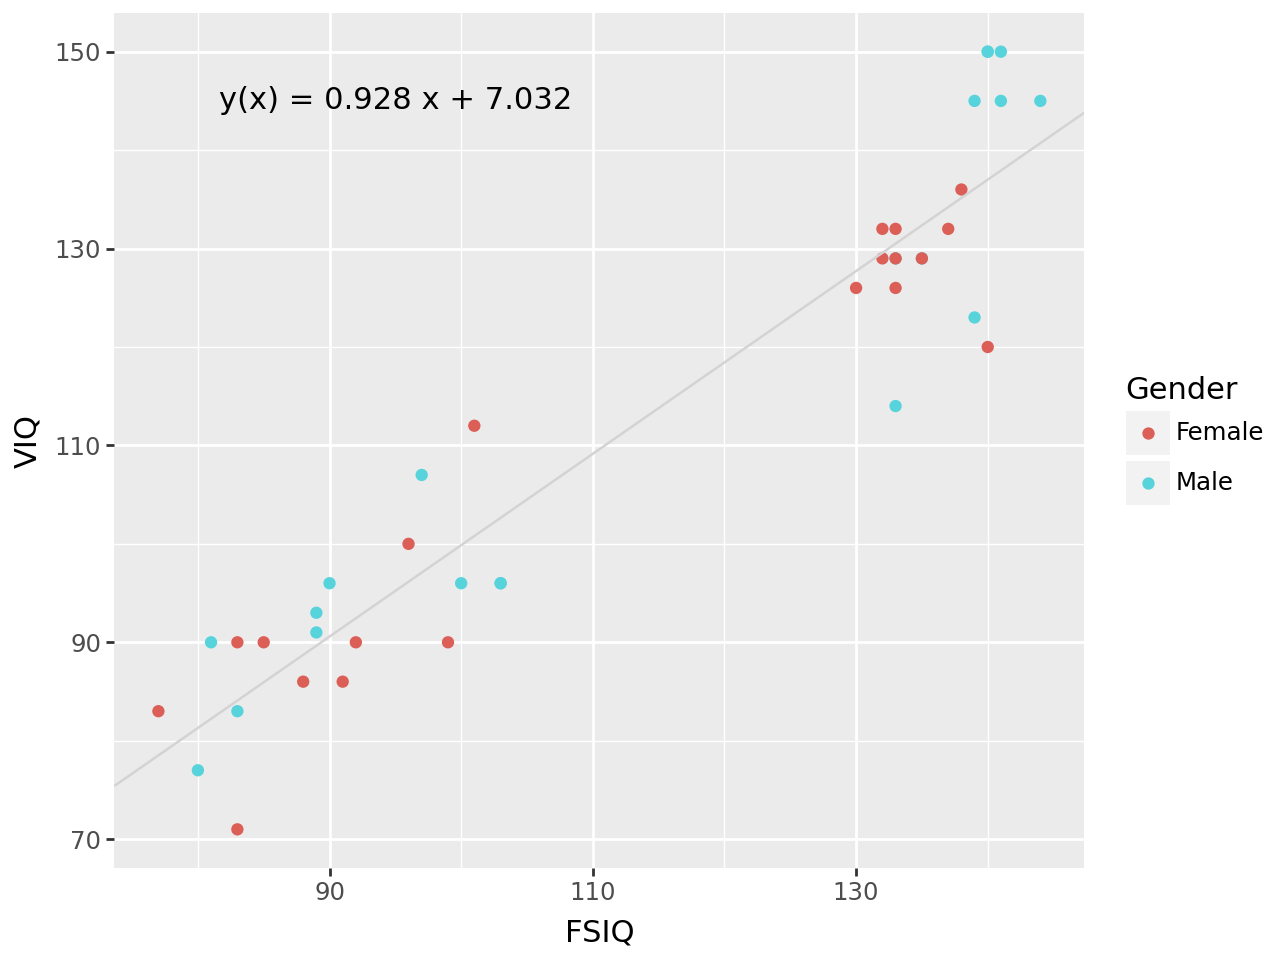

In [192]:
gg = (
    
    # Create the scatter plot with Plotnine
    p9.ggplot(data=df, mapping=p9.aes(x="FSIQ", y="VIQ", color="Gender"))
     + p9.geom_point()

    # Add the linear regression line (by hand)
     + p9.geom_abline(intercept=FitResults.intercept, slope=FitResults.slope, color='lightgray')

    # Add regression line equation (by hand)
     + p9.annotate(geom="text", x=95, y=145, label=annotation)
)

# Show plot
gg

## Student's t-test

A t-test is a statistical tool used to determine if there is a significant difference between the means of two groups, or between the mean of one group and a known value. There are three kinds of t-tests: **One-Sample t-test**, **Two-sample t-test** and **Paired samples t-test**.

### One-sample t-test

The one-sample t-test is used to compare the mean of a single group to a known or hypothesized value. This test is appropriate when you want to determine if a sample comes from a population with a specific mean. SciPy has implemented a function to perform one-sample t-test: [`scipy.stats.ttest_1samp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html). Let's see an example:

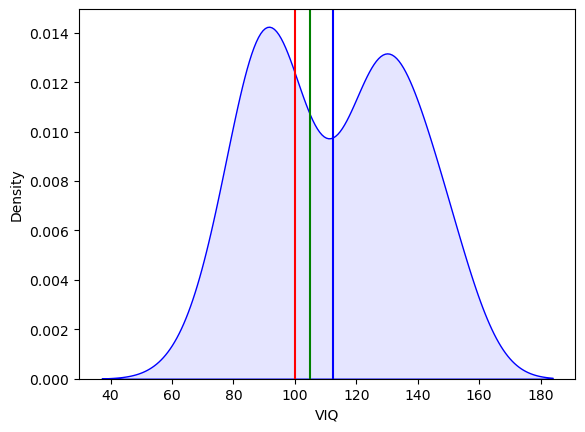

In [298]:
# Represent the distribution traced by VIQ and mark its mean
sns.kdeplot(data=df, x="VIQ", color='blue', fill='blue', alpha=0.1)
plt.axvline(x=df['VIQ'].mean(), color='blue')

# Mark a couple of arbitrary values
plt.axvline(x=100, color='red')
plt.axvline(x=105, color='green')

To test if the difference between the mean of *VIQ* and $105$ is significant, we should do:

In [250]:
# Launching a 1STT to check if VIQ mean differs than 105
stats.ttest_1samp(a=df['VIQ'], popmean=105)

TtestResult(statistic=np.float64(1.9683803719247213), pvalue=np.float64(0.05616184962448134), df=np.int64(39))

This function returns an object with the **T statistic**, the **p-value** and the **degrees of freedom**. If, for example, we assume a significance level of $0.05$, we cannot say that the mean of *VIQ* is different than $105$. In contrast, with this same significance level, we can say that the mean of *VIQ* is different than $100$:

In [252]:
# Launching a 1STT to check if VIQ mean differs than 100
stats.ttest_1samp(a=df['VIQ'], popmean=100)

TtestResult(statistic=np.float64(3.307414638540179), pvalue=np.float64(0.002030117404781822), df=np.int64(39))

### Two-sample t-test

The two-sample t-test is used to compare the means of two independent groups. The term "independent" means that the two groups are not related to each other. SciPy has implemented a function to perform two-sample t-test: [`scipy.stats.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). For example, let's compare the mean *VIQ* between females and males:

In [324]:
# Group by 'Gender' and get the mean VIQ
df_g = df.groupby(by='Gender').agg(Mean_VIQ=('VIQ', 'mean'))

# Show the dataframe
df_g

,Mean_VIQ
Gender,
Female,109.45
Male,115.25


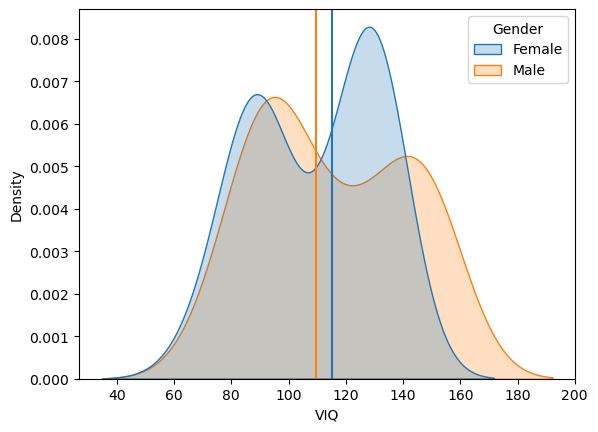

In [325]:
# Represent the distribution traced by VIQ differentiating males and females
sns.kdeplot(data=df, x="VIQ", hue='Gender', fill='Gender')

# Mark the mean VIQ for males (orange) and females (blue)
plt.axvline(x=df_g['Mean_VIQ']['Male'], color=sns.color_palette()[0])
plt.axvline(x=df_g['Mean_VIQ']['Female'], color=sns.color_palette()[1])
# Note how we used the same default colors used by Seaborn with sns.color_palette()[ ] ;)

It seems that the mean *VIQ* is slightly different between genders, but is this difference *statistically significant*? Let's check it out!

In [323]:
# Prepare filters for females and males
filter_F = df['Gender'] == 'Female'
filter_M = df['Gender'] == 'Male'

# Launching a 2STT to check if VIQ mean differs between females and males
stats.ttest_ind(df[filter_F]['VIQ'], df[filter_M]['VIQ'])

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

Assuming again the typical a significance level of $0.05$, we cannot report a significant *VIQ* different between genders.

### Paired samples t-test

Is used to compare the means of two related groups. This means that the same subjects are in both groups, such as when you measure something before and after an intervention.

repeated measurements on the same individuals

PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

C:\Users\giana\AppData\Local\Temp\ipykernel_15284\1217137057.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\giana\AppData\Local\Temp\ipykernel_15284\1217137057.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='PIQ', ylabel='Density'>

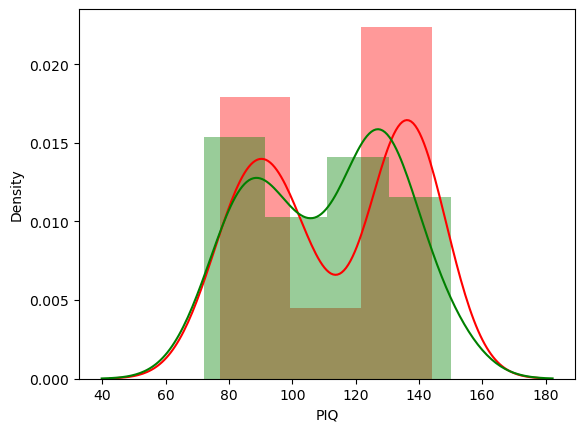

In [327]:
stats.ttest_ind(df['FSIQ'], df['PIQ'])
sns.distplot(df['FSIQ'], color='r')
sns.distplot(df['PIQ'], color='g')

# try to use groupby to run a two-sample t-test

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:

In [12]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

This is equivalent to a 1-sample test on the difference:

<ipython-input-13-0674b7f0f3b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['FSIQ'] - data['PIQ'])


TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

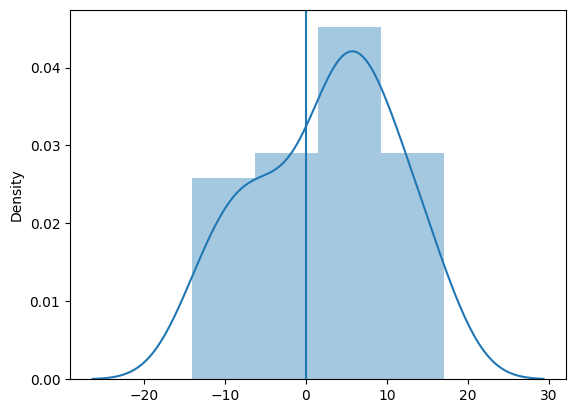

In [13]:
sns.distplot(data['FSIQ'] - data['PIQ'])
plt.axvline(0)
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)


T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption. Note The corresponding test in the non paired case is the Mann–Whitney U test, scipy.stats.mannwhitneyu().

In [14]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

### Exercise

Test the difference between weights in males and females.
Use non parametric statistics to test the difference between VIQ in males and females.
Conclusion: we find that the data does not support the hypothesis that males and females have different VIQ.

# Linear models, multiple factors, and analysis of variance
Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms:

> y = ax + b + e

where e is observation noise. We will use the statsmodels module to:

Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
Test that coef is non zero.

In [15]:
x = np.linspace(-5, 5, 20)
x2= np.linspace(0,10, 20)
x3=  np.random.normal(size=20)

np.random.seed(1)
# normal distributed noise
y = -5 + 3*x -10*x2 + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x,'x2': x2, 'x3':x3, 'y': y})

In [16]:
data

,x,x2,x3,y
0,-5.000000,0.000000,0.439405,-13.502619
1,-4.473684,0.526316,0.215790,-26.131236
2,-3.947368,1.052632,1.372640,-29.481108
3,-3.421053,1.578947,2.296791,-35.344506
4,-2.894737,2.105263,-1.405669,-31.275212
5,-2.368421,2.631579,0.230429,-47.627207
6,-1.842105,3.157895,0.326071,-35.126016
7,-1.315789,3.684211,0.040945,-48.834301
8,-0.789474,4.210526,1.593660,-48.197528
9,-0.263158,4.736842,1.229309,-54.155376


In [17]:
from statsmodels.formula.api import ols
model = ols("y ~ x + x2 + x3", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     202.2
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.41e-12
Time:                        14:43:03   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             122.0
Df Residuals:                      17   BIC:                             125.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8067      0.109    -25.790      0.0

## Categorical variables:
 comparing groups or multiple categories


In [18]:
data = pd.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values=".")
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 26 Sep 2024   Prob (F-statistic):              0.445
Time:                        14:43:03   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.


## Link to t-tests between different FSIQ and PIQ

To compare different types of IQ, we need to create a “long-form” table, listing IQs, where the type of IQ is indicated by a categorical variable:

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


<Axes: xlabel='type', ylabel='iq'>

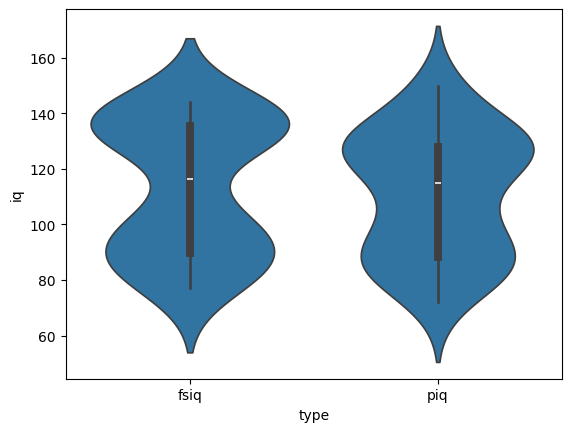

In [19]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long)

#sns.boxplot(data=data_long,x='type',y='iq')
sns.violinplot(data=data_long,x='type',y='iq')



In [20]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 26 Sep 2024   Prob (F-statistic):              0.643
Time:                        14:43:06   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

## Multiple Regression:
including multiple factors

In [21]:
data = pd.read_csv('https://scipy-lectures.org/_downloads/iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.58e-20
Time:                        14:43:06   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

# Analysis of variance (ANOVA)
In the above iris example, we wish to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. This can be formulated as testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above (it is an Analysis of Variance, ANOVA). For this, we write a vector of ‘contrast’ on the parameters estimated: we want to test "name[T.versicolor] - name[T.virginica]", with an F-test.

In [22]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.245335346574177, p=0.07369058781701142, df_denom=146, df_num=1>
